<a href="https://colab.research.google.com/github/lauraAgatha/Data-Analytics/blob/main/describing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Describing Data

In [1]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Describing a dataset is surprisingly hard. Take this (simulated) data containing total income in 1980 for each of the 100.000 inhabitans of Fooville, for example.

In [2]:
income_samples = np.round(np.hstack([np.random.normal(2.5e4, 5e3, int(7e4)),
                                     np.random.normal(5.5e4, 4e3, int(2e4)),
                                     np.random.normal(9e4, 2e3, int(1e4))]),
                          2)
income_samples[income_samples < 0] = - income_samples[income_samples < 0]
np.random.shuffle(income_samples)

pd.DataFrame(income_samples, columns=['Income'])

,Income
0,14610.63
1,50861.99
2,47883.26
3,22172.78
4,93842.82
...,...
99995,30363.67
99996,25380.26
99997,30735.89
99998,93279.09


These are 100k datapoints. It's impossible to look at them all one by one. How are we going to interpret that large bag of unsorted data?

## Mean

One measure we should take a look at is the average, the **mean** of the data. The mean is calculated like so:

1. Sum up all the values
2. Divide them by the number of datapoints

Let's apply this to our data from the inhabitants of Fooville.

In [3]:
income_samples_mean = np.mean(income_samples)
print(f'The mean income in Fooville is {income_samples_mean:.2f}')

The mean income in Fooville is 37481.67


**1. What is the mean of this list of numbers? [1, 9, 19, 100]**

*TODO: Your answer here.*

In [4]:
numbers = [1,9,19,100]
numbers_mean = np.mean(numbers)
print('The mean of this list of numbers is: ', numbers_mean)

The mean of this list of numbers is:  32.25


You, like me, might now be tempted to believe the data looks something like this.

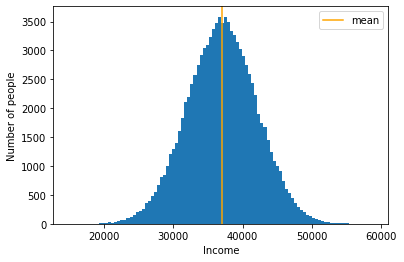

In [5]:
fig, ax = plt.subplots()
bin_vals, _, _ = ax.hist([np.random.normal(3.7e4, 5e3, int(10e4))], 100)
ax.axvline(3.7e4, label='mean', color='orange')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.legend();

**2. Explain how we should read this plot in your own words. Discuss specifically why the edge of the plot is not smooth. Hint: it's called a histogram.**

In a histogram, we count the number of datapoints that fall within a certain range. The range is indicated by the left and right boundaries of each column on the x-axis (here: income), and the number of datapoints that fall within that range is shown on the y-axis (here: number of people). The plot is not smooth because there is no smooth transition between one range and another --either a point falls into a range or it does not.

**3. Why did we choose to draw the mean as a line, and not as a dot?**
A line makes more sense because it can only mark a location on the x-axis, which is the mean here. A dot could be interpreted as implying that there is a datapoint indicating that there are a number of people with a certain income. 

**4. How realistic is it that this plot reflects the true situation, given the type of data we are looking at?**

Not realistic. In real life, income is usually not distributed around one point with a tail on either side. For true data, we expect a variety of incomes with a higher number of peaks that might correlate with level of education or other correlating variables.

Let's take a look at the *real* histogram now.

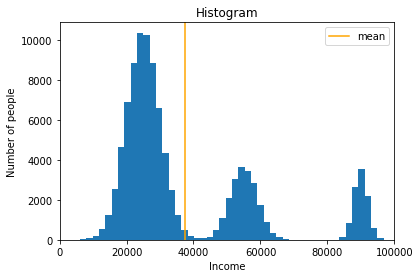

In [6]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**5. Why is the mean not located at a peak in the histogram?**

The mean is not required or even expected to be at a peak. It can be pulled in any direction depending on how the values are distributed. 

**6. How can the two plots look so different, even though their mean is the same?**

In the first plot the mean is the center around which all the other values are neatly distributed. In the second plot there are a lot of people with an income below the mean, but the income of the people who earn more is so high that the mean income is pulled in their direction.

**7. How much useful information does the mean give about the data here, in your opinion? Explain why.**

It does not give us a lot of useful information. It is clear that the mean can be pulled in any direction if the minority's values are high or low enough. For variables like income, we need more information about the actual distribution than just the mean.

## Median


An alternative measure that may be more useful is the **median**. The median is the middle value in a sorted list of all the data. Here's how to find the median:

1. Sort the data.
2. Find the middle number. If there are an even number of datapoints, take the mean of the middle two.

In [7]:
income_samples_median = np.median(income_samples)
print(f'The median income in Fooville is {income_samples_median:.2f}')

The median income in Fooville is 27816.79


Let's visualize where it is exactly on our histogram.

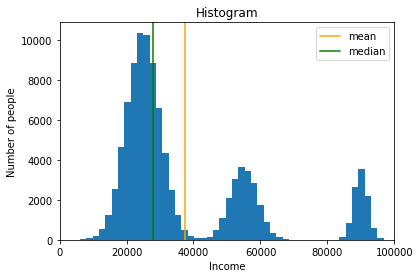

In [8]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**8. Is the median more informative about this dataset, in your opinion? Why? Consider the type of data that you're looking at.**

Yes, it is more informative. The median is much less sensitive to small groups of datapoints pulling it in a certain direction. That also goes for our dataset here. Based on the median, we know for sure that half of the population has an income below it and half has an income above it. Such conclusions could not be drawn from the mean. 

**9. How many people in Fooville have an income below the median? How many have an income above the median?**

50% of the people in Fooville have an income below the median, and 50% has an income above it. For 100,000 people, this means there are 50,000 people below and 50,000 above. 

**10. Which way does the median move if we mirror the data like we did in the bottom plot below? Which way does the mean move? Finally: which one moves more? Explain your answers.**

Both the median and the mean move to the right. This is because everyone now earns more on average (the mean) and relatively speaking, more people are on the top end of the spectrum now (the median).

The median moves more, because the large number of people that used to be on the low end of the income spectrum now sit at the top in an exactly mirrored way. That means the line that marks the 50% boundary must also be mirrored. The same reasoning applies to the weight that each earnings group holds over the mean, so the mean must also be mirrored. The 'mirror' sits in the middle, and since the mean was closer to the mirror than the median to begin with, the mean will move less and the median will move more.



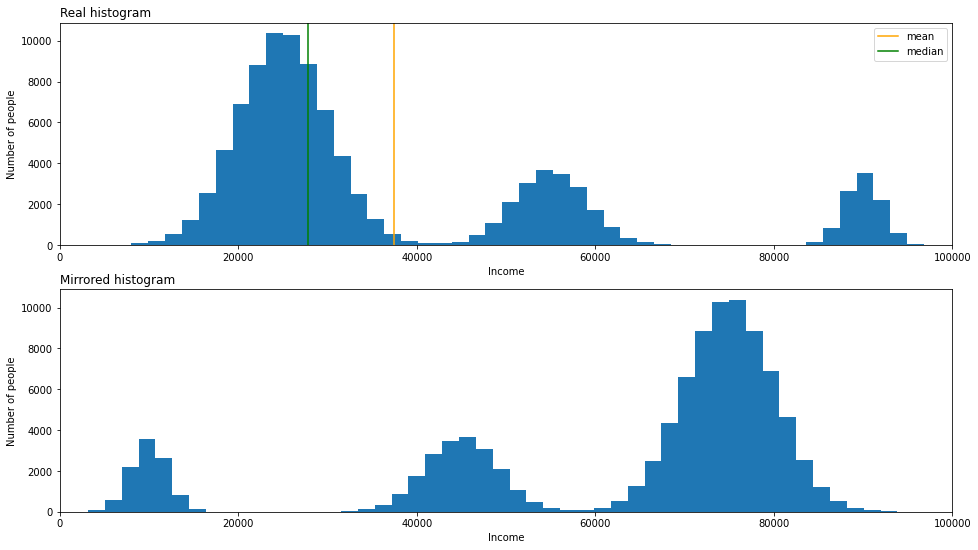

In [9]:
mirrored_income_samples = 0 - income_samples + 1e5

fig, axs = plt.subplots(2, 1, figsize=(16,9))
axs[0].set_title('Real histogram', loc='left')
axs[0].hist(income_samples, bins=50)
axs[0].axvline(income_samples_mean, color='orange', label='mean')
axs[0].axvline(income_samples_median, color='green', label='median')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Number of people')
axs[0].set_xlim([0, 1e5])
axs[0].legend();
axs[1].set_title('Mirrored histogram', loc='left')
axs[1].hist(mirrored_income_samples, bins=50)
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Number of people')
axs[1].set_xlim([0, 1e5]);

## Mode and binning

A third number that gives some information about data is distributed is the **mode**. This is the value that occurs most frequently out of all the values.

Let's count how often each number occurs in our (non-mirrored) dataset and see which one occurs most often.

The mode of the income data from Fooville is 20450.46.
It occurs 3 times.


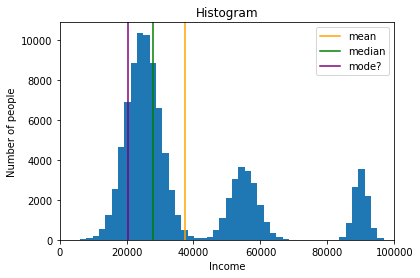

In [10]:
unique, frequency = np.unique(income_samples, return_counts = True)
income_samples_mode_freq = np.max(frequency)
income_samples_mode = unique[np.argmax(frequency)]
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')

fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode?')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

Hm! This does not match with what we learn from our histogram.

**11. What level of income would you have expected to be the mode?**

The income with the highest peak, so around ~25000

**12. What is the problem that caused us to land on a strange value for the mode?**

The income scale is continuous. This means it is very unlikely that two people earn the exact same amount. So, if we check which value occurs the most frequently, even a value that occurs twice would probably be a winner.
The problem that we have can be solved by *binning* the numbers in our data. Here's how that works:

1. Choose a number of *bins*. Think of these like buckets.
2. Divide the area between the minimum and maximum values of the data into smaller areas according to the number of bins.
3. Look at each datapoint and put it in the bin that it belongs to.
4. Count how many datapoints are in each bin.
5. Let each bin be represented by the middle value of the bin.

Let's do this and find the mode again.

The mode of the income data from Fooville is 25508.70.
It occurs 5248 times.


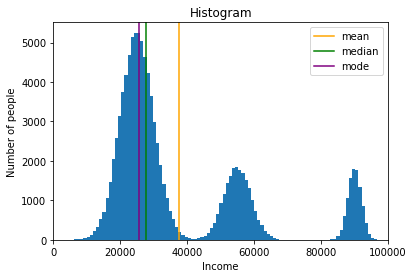

In [19]:
# PLAY AROUND WITH THIS VALUE
bins = 100
# DON'T MODIFY THE LINES BELOW

hist, bin_edges = np.histogram(income_samples, bins=bins)
income_samples_mode_freq = np.max(hist)
mode_bin_index = np.argmax(hist)
income_samples_mode = np.mean(bin_edges[mode_bin_index:mode_bin_index+2])
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=bins)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**13. How did binning solve the problem you described in your answer to question 12?**

Instead of counting the number of times each unique value occurs (which is highly likely to be one time only), we count how many values occur within a certain range. This sidesteps the problem we saw in question 12.

**14. Would a bin count of 3 suffice? What about 100? What is the consideration in choosing a higher or lower bin count? And what is the downside of going too far in either direction?**

Using 3 bins is not enough to capture the granularity in the data. It would mean using only 3 ranges to group all the data, causing a major loss of resolution. This is the downside of choosing a low number of bins.

A higher bin number takes longer to process, simply due to the nature of checks that have to be performed to fill each bin with the datapoints that belong in it. A higher bin count also eventually defeats the purpose of binning at all, since we might have so many bins that each value is assigned to its own bin.

For this dataset, a bincount between 20 and 100 seems reasonable.

## Quartiles and Boxplots

Finally, we will describe our data with a few extra measures:

- The min; the lowest value in the dataset.
- The max; the highest value in the dataset.
- The first quartile; the median of the lower half of the dataset. You find this value by sorting the data and selecting the middle of the lower half.
- The third quartile; the median of the upper half of the dataset. You find this value by sorting the data and selecting the middle of the upper half.

Together with the median, this is called the *five-number summary*. It is common to visualize these numbers in a type of plot that's called a *boxplot*. Here it is for the Fooville data.

The minimum is at 2368.82
The first quartile is at 23152.06
The third quartile is at 52240.31
The maximum is at 96817.32


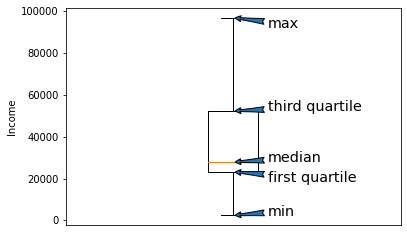

In [12]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
sorted_income_samples = np.sort(income_samples)
minimum = np.min(income_samples)
maximum = np.max(income_samples)
first_quartile = sorted_income_samples[int(sorted_income_samples.shape[0] / 4)]
third_quartile = sorted_income_samples[int(3 * sorted_income_samples.shape[0] / 4)]
ax.annotate('min', (1, minimum), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('max', (1, maximum), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('median', (1, income_samples_median), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('first quartile', (1, first_quartile), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('third quartile', (1, third_quartile), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.set_ylabel('Income')
ax.set_xticks([])

print(f'The minimum is at {minimum}')
print(f'The first quartile is at {first_quartile}')
print(f'The third quartile is at {third_quartile}')
print(f'The maximum is at {maximum}')

Here is the boxplot again without our annotations.

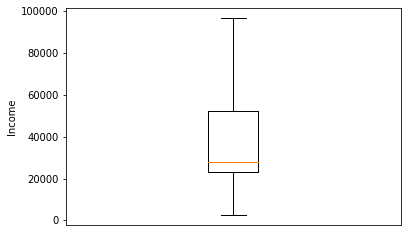

In [13]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
ax.set_ylabel('Income')
ax.set_xticks([]);

**15. How many inhabitants of Fooville have an income above the first quartile?**

75%, meaning 75,000 inhabitants.


**16. How many inhabitants of Fooville have an income between the first and third quartile?**

100 - 25 - 25 = 50%, meaning 50,000 inhabitants

**17. Which of the following statements are correct? (type an `x` in those boxes)**

*TODO: Fill in the right boxes.*

   - [ ] "25% of all Fooville inhabitants have an income above 20.000"
   - [X] "50% of all Fooville inhabitants have an income between around 23.000 and around 52.000"
   - [X] "There are no Fooville inhabitants with an income above 98.000."

**18. Does the mean always fall between the first and third quartile? Explain your answer.**

No. Quartiles are resistant to changes in the data, whereas the mean is sensitive to changes in even any one data value. This means that extreme outlier cases in the data can couse the mean to fall outside the first and third quartile.
The top 25% may have values so far above the third quartile that the mean is pulled all the way above the 75% mark. Similarly, the lowest 25% may have such low values that the mean is pulled below the 25% mark.

**19. Do you think a boxplot is a nice summary of the Fooville income data? Why? How does it compare to the histogram?**

Yes, it gives a good overview over how the income level is distributed over all the inhabitants by showing the min, max, quartiles and the median. A histogram may be better for getting a quick, intuitive understanding of where the peaks are, but it is not possible to draw conclusions like "50% of all Fooville inhabitants have an income between around 23k and 52k" from it, which is possible with the boxplot.

That's it for this lesson! You now have an intuitive understanding of:

- The mean
- The median
- The mode
- Binning
- Histograms
- The minimum and maximum
- The first and third quartile
- Boxplots

Congratulations! That's a lot of material to work through.